In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/palles77/MachineLearning_Exercise4/main/Employee_Compensation_SF.csv')

In [12]:
# function returning column index in a dataframe
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [17]:
# reading 'Total Benefits' -> column 20, 'Total Compensation' -> column 21
(column_first, colum_second) = column_index(dataset, ['Total Benefits', 'Total Compensation'])
# get sample 1000 rows
dataset_for_clustering = dataset.sample(1000).iloc[:, [column_first, colum_second]].values

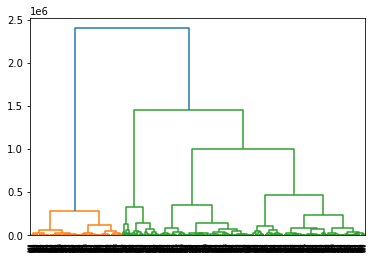

In [18]:
# Drawing dendrogram
dendrogram = sch.dendrogram(sch.linkage(dataset_for_clustering, method='ward'))

In [19]:
model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

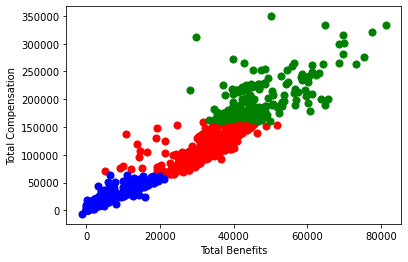

In [21]:
# Drawing Clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.xlabel('Total Benefits')
plt.ylabel('Total Compensation')
plt.show()